In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob
import scipy.ndimage

In [2]:
class neuralNetwork:
    
    #신경망 초기화
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 설정
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #학습률
        self.lr = learningrate
        
        #활성화 함수 시그모이드
        self.activation_function = lambda x: 1/(1 + np.exp(-x))
        self.inverse_activation_function = lambda x : np.log(x) - np.log(1-x)
        pass
    
    #신경망 학습
    def train(self, inputs_list, targets_list):
        #입력 리스트를 2차원의 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호
        hidden_inputs = np.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #최종 출력계층으로 들어오는 신호
        final_inputs = np.dot(self.who, hidden_outputs)
        #최종 출력계층에서 나가는 신호
        final_outputs = self.activation_function(final_inputs)
        
        #오차 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        #은닉계층의 오차는 가중치에 의해 나뉜 출력계층의 오차들을 재조합해 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #은닉계층과 출력계층간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs*(1.0 - final_outputs)), np.transpose(hidden_outputs))
        #입력계층과 은닉계층간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs*(1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #신경망에 질의하기
    def query(self, inputs_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호
        hidden_inputs = np.dot(self.wih, inputs)
        #은닉계층에서 나가는 신호
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #최종 출력계층으로 들어오는 신호
        final_inputs = np.dot(self.who, hidden_outputs)
        #최종 출력계층에서 나가는 신호
        final_outputs = self.activation_function(final_inputs)
        
        
        return final_outputs
    
    def backquery(self, targets_list):
        final_outputs = np.array(targets_list, ndmin=2).T
        final_inputs = self.inverse_activation_function(final_outputs)
        
        hidden_outputs = np.dot(self.who.T, final_inputs)
        
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs += 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        inputs = np.dot(self.wih.T, hidden_inputs)
        
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs += 0.98
        inputs += 0.01
        
        return inputs
    
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.01

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open(r'mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()


epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        inputs_plus_10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, reshape=False)
        
        inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, reshape=False)

        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        n.train(inputs_plus_10_img.reshape(-1),targets)
        n.train(inputs_minus10_img.reshape(-1),targets)
        pass
    pass

# back query

label = 0
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


<ipython-input-2-f75e89e87a6c>:19: RuntimeWarning: invalid value encountered in log
  self.inverse_activation_function = lambda x : np.log(x) - np.log(1-x)
C:\Users\kozzi\Anaconda3\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\kozzi\Anaconda3\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\kozzi\Anaconda3\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\kozzi\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


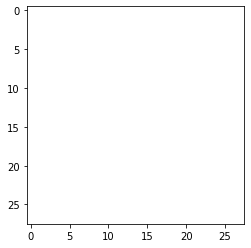

label = 1
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


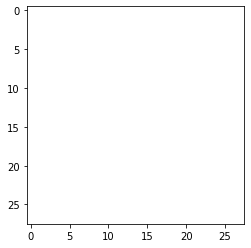

label = 2
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


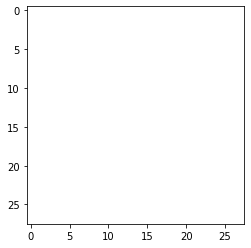

label = 3
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]


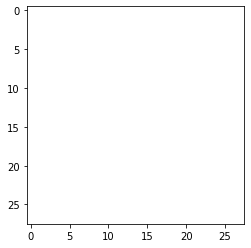

label = 4
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


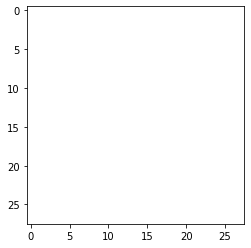

label = 5
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


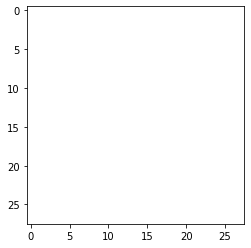

label = 6
[0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]


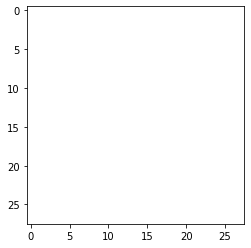

label = 7
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


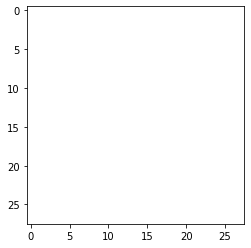

label = 8
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]


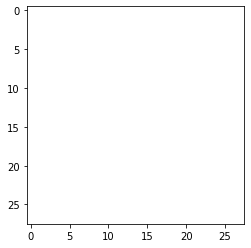

label = 9
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


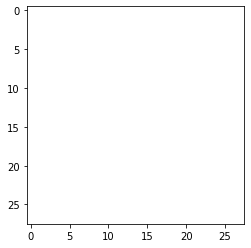

In [3]:
for label in range(10):
    print('label =', label)
    targets = np.zeros(output_nodes) + 0.01
    targets[label] = 0.99
    print(targets)
    image_data = n.backquery(targets)
    plt.imshow(image_data.reshape(28,28), cmap='Reds', interpolation='None')
    plt.show()
    pass

# test data

In [5]:
test_data_file = open(r'mnist_test.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass


scorecard_array = np.asarray(scorecard)
print('test data')
print('epochs = ',epochs,'hidden_nodes=',hidden_nodes, 'learning_rate =', learning_rate)
print('performance = ', scorecard_array.sum() / scorecard_array.size)

test data
epochs =  5 hidden_nodes= 200 learning_rate = 0.01
performance =  0.9725


# 제공 손글씨

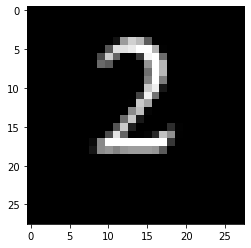

Answer= 2
My answer 2


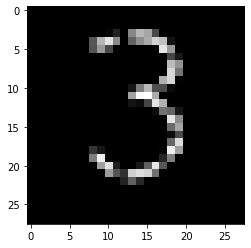

Answer= 3
My answer 3


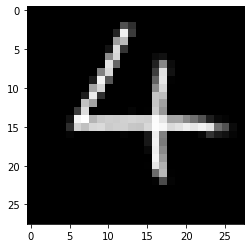

Answer= 4
My answer 4


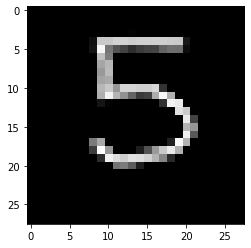

Answer= 5
My answer 5


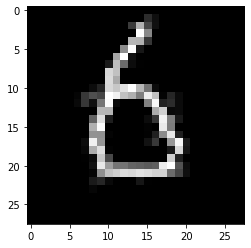

Answer= 6
My answer 6
Mnist 제공 손글씨
epochs =  5 hidden_nodes= 200 learning_rate = 0.01
Performance= 1.0


In [6]:
scorecard = []

for image_file_name in glob.glob(r'my_own_images/2828_my_own_?.PNG'):
    correct_label = int(image_file_name[-5])
    
    image_array = imageio.imread(image_file_name)
    image_array = image_array[:,:,0]
   
    image_data = 255.0 - image_array.reshape(784)
    image_data = (image_data / 255.0 * 0.99) + 0.01
    
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    plt.show()
    
    outputs = n.query(image_data)
    label = np.argmax(outputs)
    print('Answer=',correct_label)
    print('My answer',label)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print('==========================================================')
print('Mnist 제공 손글씨')
print('epochs = ',epochs,'hidden_nodes=',hidden_nodes, 'learning_rate =', learning_rate)
print('Performance=', scorecard_array.sum() / scorecard_array.size)

# 그림판 손글씨

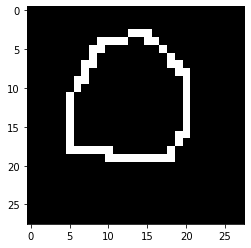

Answer= 0
My answer 2


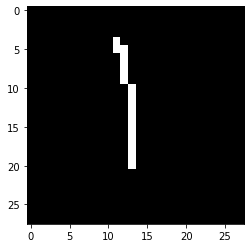

Answer= 1
My answer 2


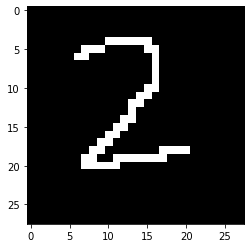

Answer= 2
My answer 2


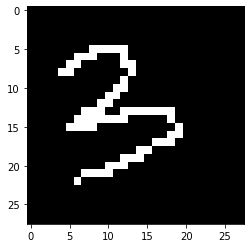

Answer= 3
My answer 4


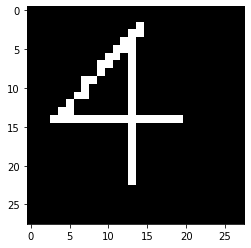

Answer= 4
My answer 8


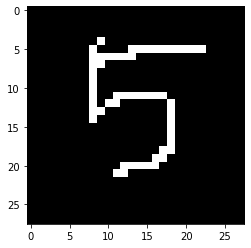

Answer= 5
My answer 5


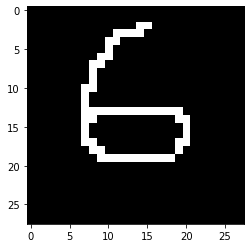

Answer= 6
My answer 6


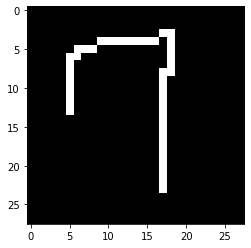

Answer= 7
My answer 7


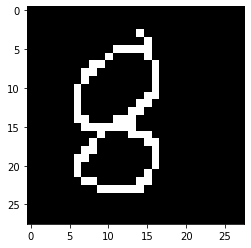

Answer= 8
My answer 8


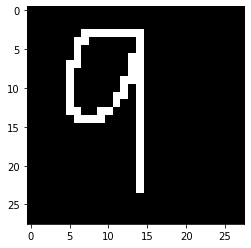

Answer= 9
My answer 1
My 그림판 손글씨
epochs =  5 hidden_nodes= 200 learning_rate = 0.01
Performance= 0.5


In [7]:
scorecard = []

for image_file_name in glob.glob(r'my_own_images/hand_letter_?.PNG'):
    correct_label = int(image_file_name[-5])
    
    image_array = imageio.imread(image_file_name)
    image_array = image_array[:,:,0]
   
    image_data = 255.0 - image_array.reshape(784)
    image_data = (image_data / 255.0 * 0.99) + 0.01
    
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    plt.show()
    
    outputs = n.query(image_data)
    label = np.argmax(outputs)
    print('Answer=',correct_label)
    print('My answer',label)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print('==========================================================')
print('My 그림판 손글씨')
print('epochs = ',epochs,'hidden_nodes=',hidden_nodes, 'learning_rate =', learning_rate)
print('Performance=', scorecard_array.sum() / scorecard_array.size)

# A4 손글씨

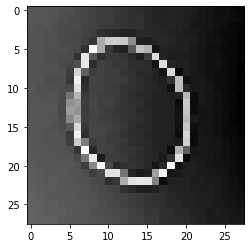

Answer= 0
My answer 3


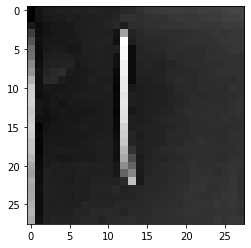

Answer= 1
My answer 3


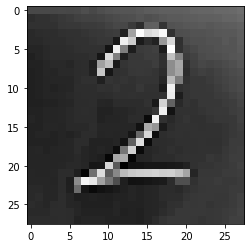

Answer= 2
My answer 3


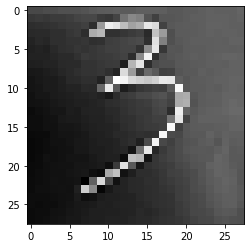

Answer= 3
My answer 3


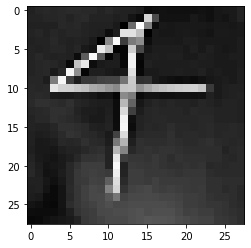

Answer= 4
My answer 3


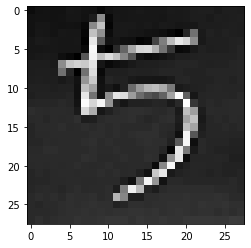

Answer= 5
My answer 3


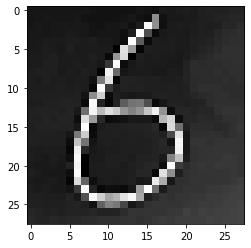

Answer= 6
My answer 3


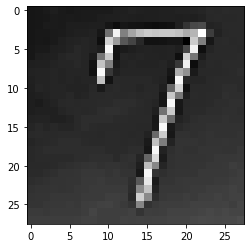

Answer= 7
My answer 3


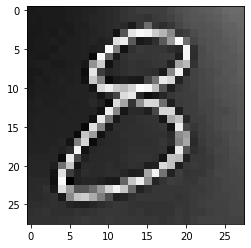

Answer= 8
My answer 3


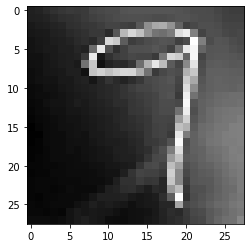

Answer= 9
My answer 3
My 손글씨
epochs =  5 hidden_nodes= 200 learning_rate = 0.01
Performance= 0.1


In [8]:
scorecard = []

for image_file_name in glob.glob(r'my_own_images/my_letter_?.PNG'):
    correct_label = int(image_file_name[-5])
    
    image_array = imageio.imread(image_file_name)
    image_array = image_array[:,:,0]
   
    image_data = 255.0 - image_array.reshape(784)
    image_data = (image_data / 255.0 * 0.99) + 0.01
    
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    plt.show()
    
    outputs = n.query(image_data)
    label = np.argmax(outputs)
    print('Answer=',correct_label)
    print('My answer',label)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print('=============================================================')
print('My 손글씨')
print('epochs = ',epochs,'hidden_nodes=',hidden_nodes, 'learning_rate =', learning_rate)
print('Performance=', scorecard_array.sum() / scorecard_array.size)